In [70]:
import os
import json
import numpy as np
import time
import sys
import random
from typing import Optional, List, Dict, Any, NamedTuple, Iterable, Tuple
from more_itertools import chunked, flatten
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
def load_representations(file_path: str) -> np.ndarray:
    return np.load(file_path)

random_seed = 0
data_code_path=""
data_docstring_path =""
data_code_representation = load_representations(data_code_path)
data_docstring_representation = load_representations(data_docstring_path)


In [4]:
def calculate_cosine_similarity_matrix(vectors1, vectors2):
    if isinstance(vectors1, np.ndarray):
        vectors1 = torch.tensor(vectors1)
    if isinstance(vectors2, np.ndarray):
        vectors2 = torch.tensor(vectors2)

    dot_product = torch.matmul(vectors1, vectors2.T)
    norm1 = vectors1.norm(dim=1).unsqueeze(1)
    norm2 = vectors2.norm(dim=1).unsqueeze(0)
    cosine_similarity = dot_product / (norm1 * norm2)
    return cosine_similarity.diag().tolist()

def calculate_cosine_similarity(vectors1, vectors2):
    similarities = []
    for vec1, vec2 in zip(vectors1, vectors2):
        vec1_tensor = torch.tensor(vec1)
        vec2_tensor = torch.tensor(vec2)
        sim = F.cosine_similarity(vec1_tensor.unsqueeze(0), vec2_tensor.unsqueeze(0))
        similarities.append(sim.item())
    return similarities

np.random.seed(random_seed) 
idxs = np.arange(len(data_code_representation))
np.random.shuffle(idxs)

for i in range(len(idxs)):
    if idxs[i] == i:
        if idxs[i] + 2 < len(idxs):
            idxs[i] = idxs[i] + 2
        else:
            idxs[i] = idxs[i] - 2

negative_samples = data_code_representation[idxs]


cos_pos = calculate_cosine_similarity(data_docstring_representation, data_code_representation)

cos_neg = calculate_cosine_similarity(data_docstring_representation, negative_samples)



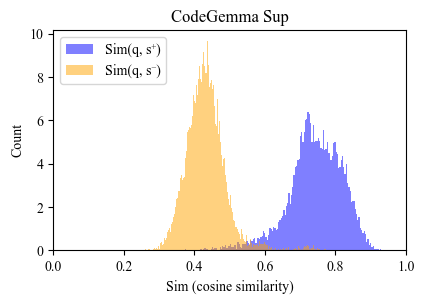

In [73]:
import matplotlib.pyplot as plt
import matplotlib as mpl

save_path =""

mpl.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['text.usetex'] = False
mpl.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(4.55, 2.86))
n1, bins1, patches1 = plt.hist(cos_pos, bins=200, alpha=0.5, label='Sim(q, s⁺)', color='blue', density=True)
n2, bins2, patches2 = plt.hist(cos_neg, bins=200, alpha=0.5, label='Sim(q, s⁻)', color='orange', density=True)
plt.xlabel('Sim (cosine similarity)')
plt.ylabel('Count')
plt.xlim(0, 1)
plt.title('CodeGemma Sup')
plt.legend(loc='upper left')

plt.savefig(save_path, format='pdf', bbox_inches='tight')

plt.show()

In [1]:
import os
import json
import numpy as np
import time
import sys
import random
from typing import Optional, List, Dict, Any, NamedTuple, Iterable, Tuple
from more_itertools import chunked, flatten
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
def load_representations(file_path: str) -> np.ndarray:
    return np.load(file_path)


result_path = ""
random_seed = 0

data_code_path=""
data_docstring_path =""
data_code_representation = load_representations(data_code_path)
data_docstring_representation = load_representations(data_docstring_path)

In [5]:
np.random.seed(random_seed)  
idxs = np.arange(len(data_code_representation))
np.random.shuffle(idxs)

for i in range(len(idxs)):
    if idxs[i] == i:
        if idxs[i] + 2 < len(idxs):
            idxs[i] = idxs[i] + 2
        else:
            idxs[i] = idxs[i] - 2

negative_samples = data_code_representation[idxs]

cos_pos = calculate_cosine_similarity(data_docstring_representation, data_code_representation)

cos_neg = calculate_cosine_similarity(data_docstring_representation, negative_samples)


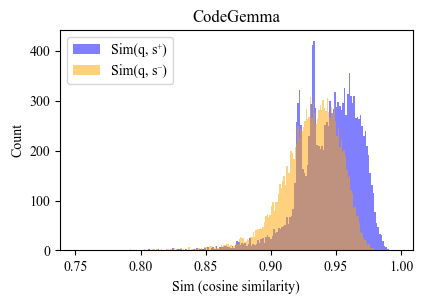

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl

save_path =""

mpl.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['text.usetex'] = False
mpl.rcParams['axes.unicode_minus'] = False


fig, ax = plt.subplots(figsize=(4.55, 2.86))
plt.hist(cos_pos, bins=200, alpha=0.5, label='Sim(q, s⁺)', color='blue')
plt.hist(cos_neg, bins=200, alpha=0.5, label='Sim(q, s⁻)', color='orange')



plt.xlabel('Sim (cosine similarity)')
plt.ylabel('Count')

plt.title('CodeGemma')
plt.legend(loc='upper left')



plt.savefig(save_path, format='pdf', bbox_inches='tight')

plt.show()

In [8]:

random_seed = 0

data_code_path=""
data_docstring_path =""
data_code_representation = load_representations(data_code_path)
data_docstring_representation = load_representations(data_docstring_path)

In [9]:


np.random.seed(random_seed)  
idxs = np.arange(len(data_code_representation))
np.random.shuffle(idxs)


for i in range(len(idxs)):
    if idxs[i] == i:
        if idxs[i] + 2 < len(idxs):
            idxs[i] = idxs[i] + 2
        else:
            idxs[i] = idxs[i] - 2


negative_samples = data_code_representation[idxs]
cos_pos = calculate_cosine_similarity(data_docstring_representation, data_code_representation)
cos_neg = calculate_cosine_similarity(data_docstring_representation, negative_samples)

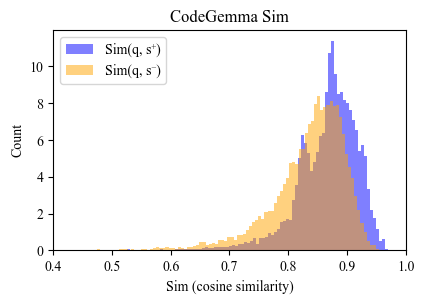

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl

save_path =""
mpl.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['text.usetex'] = False
mpl.rcParams['axes.unicode_minus'] = False


fig, ax = plt.subplots(figsize=(4.55, 2.86))

n1, bins1, patches1 = plt.hist(cos_pos, bins=200, alpha=0.5, label='Sim(q, s⁺)', color='blue', density=True)
n2, bins2, patches2 = plt.hist(cos_neg, bins=200, alpha=0.5, label='Sim(q, s⁻)', color='orange', density=True)
plt.xlabel('Sim (cosine similarity)')
plt.ylabel('Count')
plt.xlim(0.4, 1)
plt.title('CodeGemma Sim')
plt.legend(loc='upper left')

plt.savefig(save_path, format='pdf', bbox_inches='tight')
plt.show()